**Description**: Analyze accuracies for $m = 100, n = 50$.

**Estimated runtime**: `model.fit` was ran in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 50

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

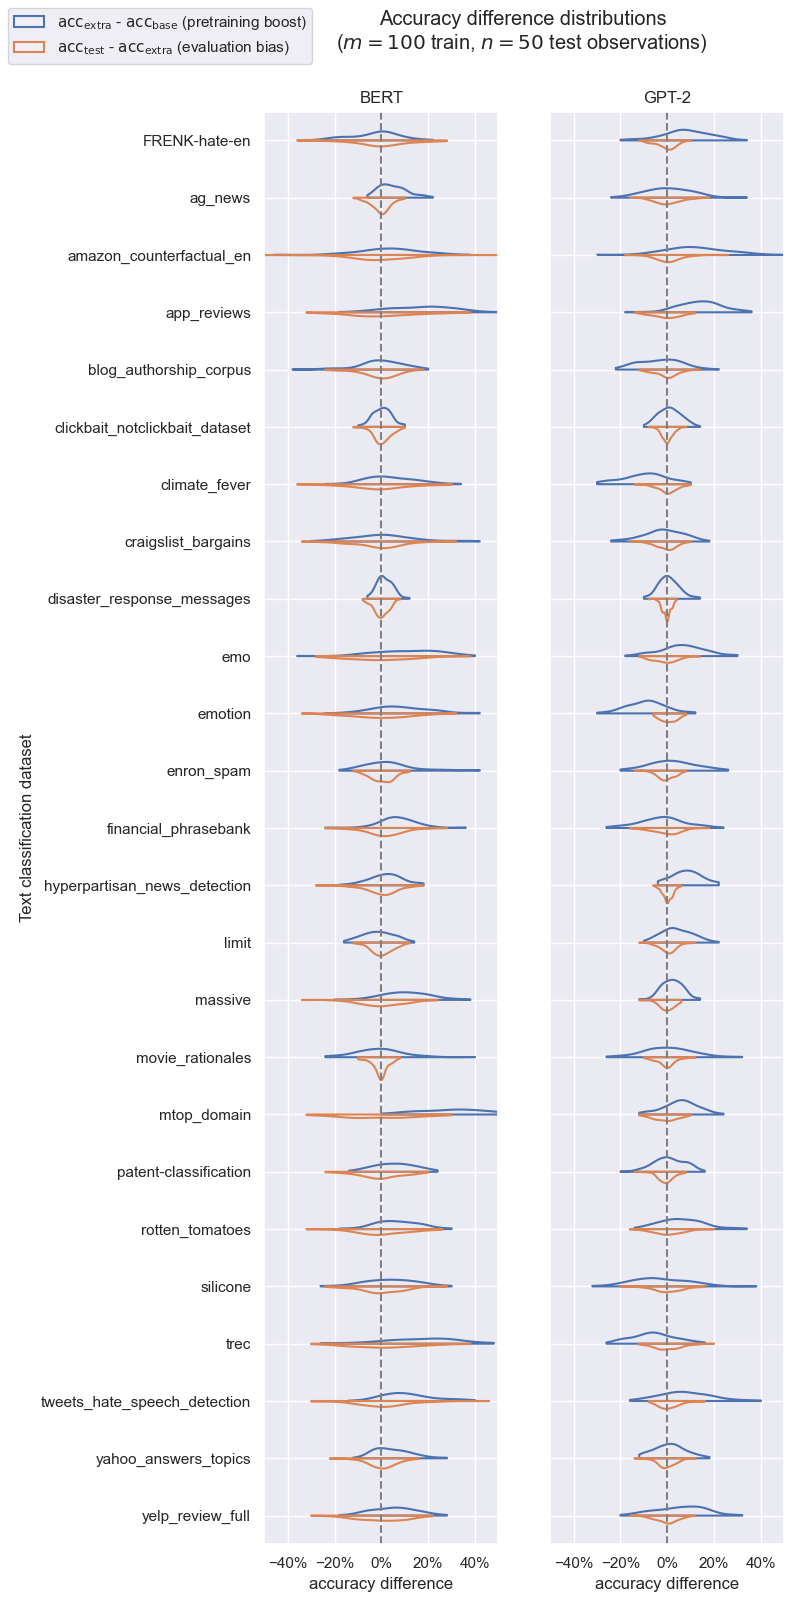

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Control

In [7]:
summary_control, summary_relative_control = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.041788 ┆ 0.010202 │
└──────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [8]:
summary_control

dataset,mean,se
"""FRENK-hate-en""",0.0269,0.011564
"""ag_news""",0.0274,0.008474
"""amazon_counter…",0.0799,0.013905
"""app_reviews""",0.1535,0.011485
"""blog_authorshi…",-0.0177,0.009557
…,…,…
"""silicone""",0.0051,0.01196
"""trec""",0.0565,0.01703
"""tweets_hate_sp…",0.0954,0.011067
"""yahoo_answers_…",0.0278,0.007526


In [9]:
summary_relative_control

dataset,mean,se
"""FRENK-hate-en""",0.080608,0.023649
"""ag_news""",0.052361,0.018052
"""amazon_counter…",0.162092,0.034412
"""app_reviews""",1.373607,0.170959
"""blog_authorshi…",-0.017802,0.01799
…,…,…
"""silicone""",0.033762,0.027691
"""trec""",0.338581,0.085276
"""tweets_hate_sp…",0.175334,0.021908
"""yahoo_answers_…",0.607625,0.167269


Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [10]:
# model_control, summary_control, az_summary_control = utils.stat_model(
#     num_correct_df,
#     treatment="extra",
#     control="base",
#     equation=equation,
#     id_vars=id_vars,
# )

In [11]:
# print(model_control)

# Treatment

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.000632 ┆ 0.000859 │
└───────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",0.0028,0.008754
"""ag_news""",0.0008,0.004832
"""amazon_counter…",-0.0018,0.010426
"""app_reviews""",0.0006,0.011178
"""blog_authorshi…",-0.0055,0.006286
…,…,…
"""silicone""",-0.0004,0.007934
"""trec""",0.0065,0.010901
"""tweets_hate_sp…",0.0072,0.008998
"""yahoo_answers_…",-0.001,0.005435


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.017395,0.016556
"""ag_news""",0.00644,0.009403
"""amazon_counter…",0.011358,0.018257
"""app_reviews""",0.086489,0.050105
"""blog_authorshi…",-0.003859,0.011995
…,…,…
"""silicone""",0.00993,0.015535
"""trec""",0.062141,0.033676
"""tweets_hate_sp…",0.018778,0.014679
"""yahoo_answers_…",0.094244,0.052686


Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [15]:
# model_bias, summary_bias, az_summary_bias = utils.stat_model(
#     num_correct_df,
#     treatment="test",
#     control="extra",
#     equation=equation,
#     id_vars=id_vars,
# )

In [16]:
# print(model_bias)

# Write inference data

Ran this in the cloud instead. See
https://github.com/kddubey/pretrain-on-test/tree/main/cloud_scripts/gcp#run-the-analysis

In [17]:
# netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
# if not os.path.exists(netcdfs):
#     os.mkdir(netcdfs)

In [18]:
# summary_control.to_netcdf(
#     filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_control.nc")
# )

In [19]:
# summary_bias.to_netcdf(
#     filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_treatment.nc")
# )